# Python Project  - How do certain factors contribute to a country's happiness ranking

# Overview

## What problem am I solving? 
Well, most of my papers in high school were hard because it was very difficult for me to understand how exactly people collected different aspects of data in a particular spreadsheet and how each aspect contributed to the point the article citing the data wanted to make. This was a journey for me to understand how exactly data is represented visually and analysed before it can be used elsewhere.

## Where is the information from? 
The information is from UNSDSN's World Happiness Ranking 2017 (https://www.kaggle.com/unsdsn/world-happiness), which essentially entails data on Happiness scored according to economic production, social support, etc.

## Why is it interesting to me?
I'm studying psychology and being a student at one of the most diverse universities in the world, I've studied and been friends with people from over 30 countries, and it intrigued me to see how living in a particular country contributes to how happy someone is. 

# Design Choices

## What design choices did I have to make? 
I started off with over 500 lines of code, but it was overly complicated and there were too many helper functions since most of my functions consumed lists. I realised simplification would be better and instead chose to work mostly with single elements rather than lists and focus on quality over quantity. As a result, I have only the essential helper functions that follow recipes and an analysis function that does what I want it to without it giving me a headache to write it. I mainly used the last few modules most: analysis functions and visualisation.
Compound data in design definitions, a main function that makes pie charts from the data read by the read function. The function that makes the pie charts in turn required 3 helper functions to calculate essential values as well as shift the domain as required.

## Why did I make the choices that I made?
Since my program depends on me understanding the data completely, I wanted to focus on channeling the understanding into impactful visuals rather than show off my complex-function-writing skills. That is why I chose the simple and elegant route over a long, long program that only had it's run time going for it. 


### Planning 

This file contains names of countries, their Happiness Rank, Happiness Score, Whisker high and whisker low of the happiness score, and Factors of Happiness (Economy, GDP per Capita, Family Health, Life Expectancy, Freedom Generosity, Trust-Government-Corruption, Dystopia Residual).

My program will produce a pie chart for the score for all of the happiness factors as fractions of the overall happiness score, since the question I want to answer is which of the factors affect the ranking most, i.e. which of the indicators is the biggest contributor to what the happiness ranking of a country is - by making a graph between the correlation between each factor and the overall happiness score of countries and a function determining which factor affects the ranking the most.

#### Here's an early sketch of what I want to visualize.

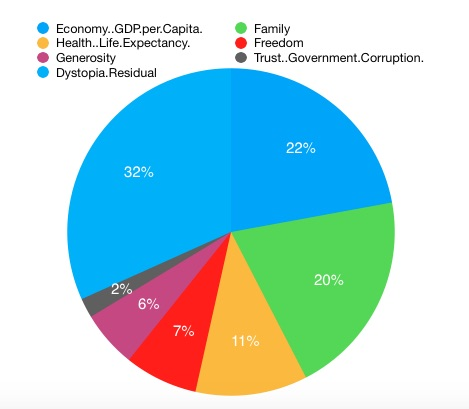

# Problem Solving

As seen above, I chose to use a pie chart to represent my data and express the important details analysed in my program since it's visually appealing. My program is a comparitive one, and so, creates multiple pie charts that can be compared with each other to draw various inferences. 

A brief description of how my program solves the problem is:
- reads the data in the .csv file
- converts it to the files I need it converted to for the analysis and main functions, analyses the different factors and calculates important values by using rather methodical mathematical formulas 
- draws the various pie charts

### Building

I will represent all the information in the csv except the whisker highs and lows of the happiness score (namely,a country's name, happiness rank, happiness score, and factors of happiness - Economy, GDP per Capita, Family Health, Life Expectancy, Freedom Generosity, Trust-Government-Corruption, Dystopia Residual), because I need to use all of the happiness factors to figure out which one contributes highest to the overall happiness score of a country (which I hence, also need), and the same information is needed to make my line chart as well.

In [3]:
from cs103 import *
import matplotlib.pyplot as plt
from typing import NamedTuple, List
import csv

##################
# Data Definitions

Country = NamedTuple('Country', [('name', str), 
                                 ('rank', int),        # in range(1, 155)
                                 ('score', float),     # in range[0, ...)
                                 ('economy', float),   # in range[0, ...)
                                 ('family', float),    # in range[0, ...)
                                 ('health', float),    # in range[0, ...)
                                 ('freedom', float),   # in range[0, ...)
                                 ('generosity', float),# in range[0, ...)
                                 ('trust', float),     # in range[0, ...)
                                 ('dystopia', float)]) # in range[0, ...)
                                 
                                
# interp. a country with name, happiness rank, happiness score, and factors
# of happiness (Economy, GDP per Capita, Family Health, Life Expectancy, 
# Freedom Generosity, Trust-Government-Corruption, Dystopia Residual)

C1 = Country("Norway", 1, 7.537000179, 1.616463184, 1.53352356, 0.796666503,
             0.635422587, 0.362012237, 0.315963835, 2.277026653)
C2 = Country("Denmark", 2, 7.521999836, 1.482383013, 1.551121593, 0.792565525,
             0.626006722, 0.355280489, 0.400770068, 2.313707352)
C3 = Country("Iceland", 3, 7.504000187, 1.48063302, 1.610574007, 0.833552122, 
             0.627162635, 0.475540221, 0.153526559, 2.322715282)
C4 = Country("United States", 14, 6.993000031, 1.546259284, 1.419920564, 0.774286628,
             0.505740523, 0.392578781, 0.135638788, 2.218113422)
C5 = Country("Ireland", 15, 6.977000237, 1.535706639, 1.558231115, 0.809782624, 
             0.573110342, 0.427858323, 0.298388153, 1.773869038)
C6 = Country("Germany", 16, 6.951000214, 1.487923384, 1.472520351, 0.798950732, 
             0.562511384, 0.33626917, 0.276731938, 2.015769958)
C7 = Country("Tanzania", 153, 3.348999977, 0.511135876, 1.041989803, 0.364509284,
             0.390017778, 0.354256362, 0.066035107, 0.621130466)

@typecheck
# template based on compound
def fn_for_country(c: Country) -> ...:
    return ... (c.name,
                c.rank,
                c.score,
                c.economy,
                c.family,
                c.health,
                c.freedom,
                c.generosity,
                c.trust,
                c.dystopia)


# List[Country]
# interp. a list of countries

LOC0 = []
LOC1 = [C1, C2]

@typecheck
# template based on arbitrary-sized and the reference rule
def fn_for_loc(loc: List[Country]) -> ...:
    # description of the acc
    acc = ... # type: ...
    for c in loc:
        acc = ... (acc, fn_for_country(c))
    return acc


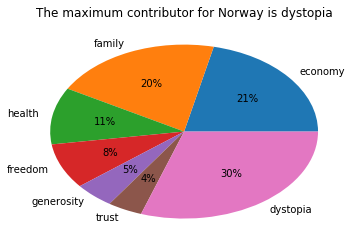

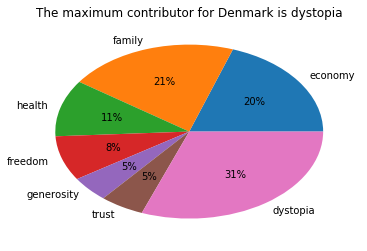

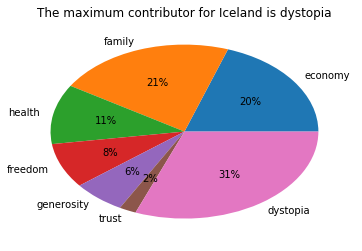

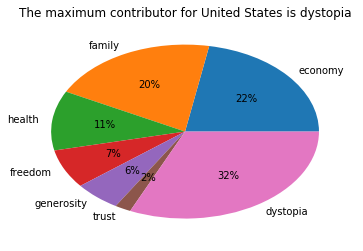

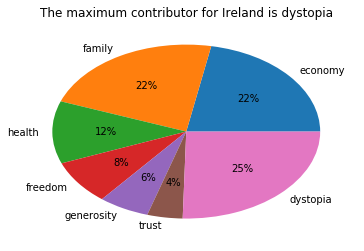

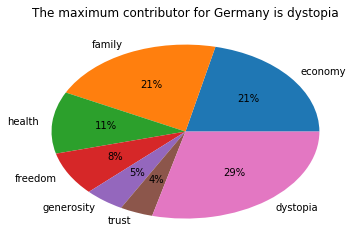

2 of 2 tests passed
2 of 2 tests passed


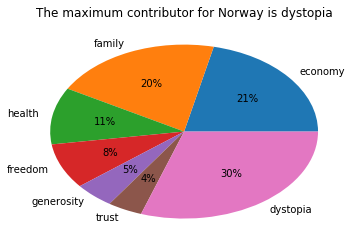

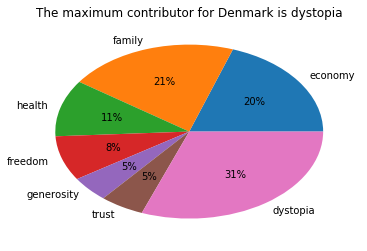

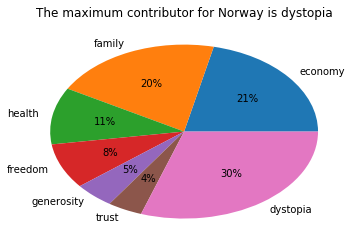

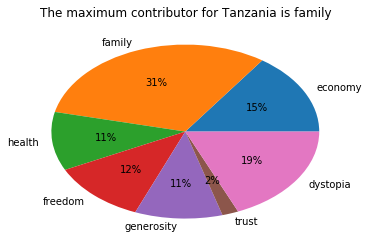

3 of 3 tests passed
3 of 3 tests passed
3 of 3 tests passed
3 of 3 tests passed


In [4]:
###########
# Functions

@typecheck
def main(filename: str) -> None:
    """
    Reads the file from given filename and draws a pie chart for every country's data in the file 
    """
    # Template from HtDAP, based on function composition 
    return show_pie_chart(read(filename))
    
@typecheck
def read(filename: str) -> List[Country]:
    """    
    reads information from the specified file and returns a list of countries
    """
    #return []  #stub
    # Template from HtDAP
    # loc contains the result so far
    loc = [] # type: List[Country]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip header line

        for row in reader:
            c = Country(row[0], 
                        parse_int(row[1]), parse_float(row[2]), parse_float(row[5]), 
                        parse_float(row[6]), parse_float(row[7]), parse_float(row[8]), 
                        parse_float(row[9]), parse_float(row[10]),parse_float(row[11]),)
            loc.append(c)
    
    return loc

   
def show_pie_chart(loc: List[Country]) -> None:
    """
    show all pie charts with the factors of happiness of the countries in loc and their 
    respective contribution to the happiness ranking, mentioning the name of the country
    and the biggest contributor to its happiness score in the title
    """
    #return None  #stub
    # Template based on (relevant aspects) of arbitrary sized and the reference rule
    labels = ["economy","family","health","freedom","generosity","trust","dystopia"]
    for c in loc:
        plt.pie(factor_percentage(c), labels=labels, autopct='%.0f%%', shadow=False)
        plt.title('The maximum contributor for ' + c.name + ' is ' + biggest_factor(c))
        plt.show()
    return None
 

@typecheck
def biggest_factor(c: Country) -> str:
    """
    returns the biggest factor contributing to the happiness ranking of a country
    """
    # return "" # stub
    # Template from Country
    list_of_cfields = [(c.economy),(c.family),(c.health),(c.freedom),(c.generosity),(c.trust),(c.dystopia)]
    if c.economy == max(list_of_cfields):
        return "economy"
    elif c.family == max(list_of_cfields):
        return "family"
    elif c.health == max(list_of_cfields):
        return "health"
    elif c.freedom == max(list_of_cfields):
        return "freedom"
    elif c.generosity == max(list_of_cfields):
        return "generosity"
    elif c.trust == max(list_of_cfields):
        return "trust"
    elif c.dystopia == max(list_of_cfields):
        return "dystopia"


@typecheck
def factor_percentage(c: Country) -> List[float]:
    """
    returns a list of percentages for each factor in the pie chart
    """
    # return 0 # stub
    # Template from Country
    return [((100 * c.economy)/sum_factors(c)),((100 * c.family)/sum_factors(c)),
            ((100 * c.health)/sum_factors(c)),((100 * c.freedom)/sum_factors(c)),
            ((100 * c.generosity)/sum_factors(c)),((100 * c.trust)/sum_factors(c)),
            ((100 * c.dystopia)/sum_factors(c))]

@typecheck
def sum_factors(c: Country) -> float:
    """
    returns the sum of the score for each factor in a country's happiness rank data
    """
    # return 0 # stub
    # Template from Country        
    return c.economy + c.family + c.health + c.freedom + c.generosity + c.trust + c.dystopia
    

start_testing()

# Examples and tests for main
expect(main("world_happiness_ranking_2017_test1.csv"), None)
expect(main("world_happiness_ranking_2017_test2.csv"), None)

summary()

start_testing()

# Examples and tests for read
expect(read("world_happiness_ranking_2017_test1.csv"), [C1, C2, C3])
expect(read("world_happiness_ranking_2017_test2.csv"), [C4, C5, C6])

summary()


start_testing()


# Examples and tests for show_pie_chart
expect(show_pie_chart(LOC0), None)
expect(show_pie_chart(LOC1), None)
expect(show_pie_chart([C1,C7]), None)

summary()

start_testing()

# Examples and tests for biggest_factor
expect(biggest_factor(C1),"dystopia")
expect(biggest_factor(C2),"dystopia")
expect(biggest_factor(C7),"family")

summary()

start_testing()
# Examples and tests for factor_percentage
expect(factor_percentage(C1),[21.446813527899174, 20.346392146448103, 10.569964167995877, 
                              8.430621785694989, 4.803084300716521, 4.1921260675027545, 30.21099800374258])
expect(factor_percentage(C2),[19.707731689200855, 20.621585584892163, 10.536864343311665, 
                              8.322526907431683, 4.723322171272125, 5.328089231960716, 30.759880071930777])
expect(factor_percentage(C7),[15.262002954513996, 31.112767071665026, 10.883880452476362, 
                              11.645538416773123, 10.577738518004907, 1.971741850763079, 18.546330735803515])

summary()

start_testing()
# Examples and tests for sum_factors
expect(sum_factors(C1),7.53707856)
expect(sum_factors(C2),7.52183476)
expect(sum_factors(C7),3.34907467)

summary()


# Most Challenging 

The most challenging thing for me, after making my program as condensed as it is, was deciding how to write the show_pie_chart function. I tried a bunch of ways, using two different functions for it, using an accumulator like the recipe says I should, etc. But I decided I'd take a leap of faith and go with my gut, and hence, wrote it like it is in this version of the program. 

# Future Work

There's a lot of scope to add to the current topic and program. I was thinking I could make the program make a pie chart of every country's happiness factors as compared to Norway's pie chart (Rank 1). Or, I could write a function that sorts countries based on what their biggest happiness contributor is, and then draw conclusions based on that and the happiness ranks of the countries.